# L-layer Feed Forward Neural Network (+ L2 Norm, + Dropout)
The purpose of this project is to build Deep Feed Forward Neural Network from scratch in python as well as implement and test few regularization techniques such as:
- Dropout
- L2 Norm
- Batch Norm
- Mini-batch
- Weight Decay

After the network is built, it will be trained using images of cats and dogs in order to learn the mapping from the inputs to the output and classify them correctly.

Feed Forward Neural network is not the best choice for image classification and is significantly inferior to Convolutional Neural Network. It's merely used for the purpose of showing how varying regularization techniques affect the performance of the model.

In [186]:
# Import libraries
import os
import time
import numpy as np
import pandas as pd
import random
import zipfile
import cv2

# Visualiztion
import matplotlib.pyplot as plt
import seaborn as sns

### Toy Dataset
This dataset will be used to check the correctness of the neural network before applaying other dataset containing images of cats and dogs.

In [341]:
# Data
x = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1]  ]).T

y = np.array([[0,0,1,1]])

### Acivation Functions
Activation functions which will be used in our model.

**Relu:**

This activation function turns all negative values into 0s and all positive stay the same

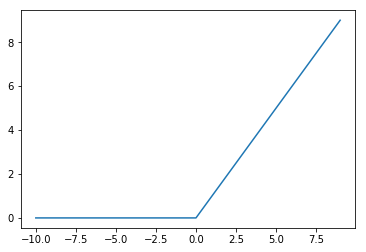

In [111]:
def relu(x, deriv=False):
    if deriv:
        return 1. * (x > 0)
    else:
        return np.maximum(0,x)

j = np.arange(20)-10
    
plt.plot(j, relu(j))
plt.show()

**Sigmoid:**

This function (description here, with math)

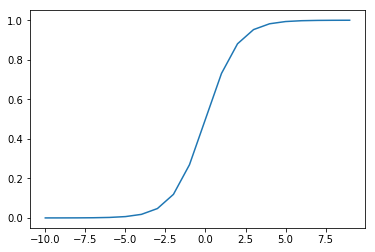

In [71]:
def sigmoid(x, deriv=False):
    if deriv:
        return (1/(1 + np.exp(-x))) * (1-(1/(1 + np.exp(-x))))
    else:
        return 1/(1 + np.exp(-x))
    
j = np.arange(20) - 10

plt.plot(j, sigmoid(j))
plt.show()

### Building the network

**Initialize parameters for an L-layer neural network**

Initialize weights and biases given **layer_dims** variable. For instance a network with dimensions of $[4, 3, 1]$ will be 2 layers deep because the input layer $[4]$ is ommited and isn't included in the numer of layers. The network will therefore have 2 sets of weights and biases with dimensions of $W^{[1]} = [3, 4], b^{[1]} = [3, 1], W^{[2]} = [1, 3], b^{[2]} = [1, 1]$.

- Input layer [4] is ommited and doesn't add up to the numer of layers.
- Dimensions of $W[l] = [l, l - 1]$ while the dimensions of $b[l] = [l, 0]$
- Use random initialization for weights and initialize all biases to zero.

In [356]:
def initialize_parameters(layer_dims):
    
    np.random.seed(1) # This ensures that our number values will always be the same.
    parameters = {}
    
    L = len(layers_dims) # Number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

### Forward propagation
Forward propagation represents one forward pass through the network. Given inputs $X^n$ the network calculates the probability $AL$ ranging from 0 to 1.


<img src="https://image.ibb.co/hjKjnc/network_graph.png" style="width:800px;height:400px;">


**Compute the forward pass:**
$$Z^{[1]} = (W^{[1]})^T * X + b^{[1]}$$
$$A^{[1]} = relu(Z^{[1]})$$
$$Z^{[2]} = (W^{[2]})^T * A^{[1]} + b^{[2]}$$
$$output = AL = sigmoid(Z^{[2]})$$


In [177]:
def linear_forward(A_prev, W, b):
    Z = np.dot(W, A_prev) + b
    cache = (A_prev, W, b)
    
    return Z, cache

In [178]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z), Z
        
    elif activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z), Z
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [362]:
def L_model_forward(X, parameters):
    L = len(parameters) // 2
    caches = []
    A = X
    
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], activation="relu")
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation="sigmoid")
    caches.append(cache)
    
    return AL, caches

### Compute cost

Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [106]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

### Backpropagation
Backpropagation represents one backward pass through the network. It calculates the gradients of our parameters $[W^{[1]}], [b^{[1]}], [W^{[2]}], [2^{[2]}]$ with respect to the cost $J$.
The gradients are then used to update these parameters using some optimization technique such as gradiend descent, rms-prop or adam.

**Compute the backward pass:**
$$ dA^{[l]} = \frac{\partial \mathcal{L} }{\partial AL} = AL - Y$$

$$Not Finished$$

In [118]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1.0 / m) * np.dot(dZ, A_prev.T)
    db = (1.0 / m) * np.sum(dZ, axis=-1, keepdims=True)
    
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [119]:
def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def relu_backward(dA, cache):

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ


def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db
        

In [370]:
def L_model_backward(AL, Y, caches):
    L = len(caches)
    grads = {}
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, 
                                                                                                  activation = "sigmoid")
    
    for l in reversed(range(1, L)):
        current_cache = caches[l - 1]
        dA = grads["dA" + str(l+1)]
        grads["dA" + str(l)], grads["dW" + str(l)], grads["db" + str(l)] = linear_activation_backward(dA, current_cache,
                                                                                                     activation = "relu")
    return grads

### Update parameters (using Gradient Descent)

In [364]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

### Build the Network

In [365]:
# Constants #
layers_dims = [3, 5, 5, 1]

In [396]:
def L_layer_model_simple(X, Y, layers_dims, iterations, parameters=None, learning_rate = 0.0075, log_every = 10):

    parameters = initialize_parameters(layers_dims)
    costs = []
    
    for i in range(iterations):

        # Forward pass
        AL, caches = L_model_forward(X, parameters)
        
        # Calculate the cost
        cost = compute_cost(AL, Y)
        costs.append(cost)
        
        # Get gradients for our parameters
        grads = L_model_backward(AL, Y, caches)

        # Update parameters using gradient descent
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % log_every == 0:
            print("Iteration:", i, "Cost:", cost)
            
    # Plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, costs

Iteration: 0 Cost: 0.690750398375514
Iteration: 500 Cost: 0.4936871776582399
Iteration: 1000 Cost: 0.23904265175421413
Iteration: 1500 Cost: 0.07821585002966713
Iteration: 2000 Cost: 0.02986988158486701
Iteration: 2500 Cost: 0.0157054585384173
Iteration: 3000 Cost: 0.009963254029318597
Iteration: 3500 Cost: 0.007090680859856887
Iteration: 4000 Cost: 0.005391163350264521
Iteration: 4500 Cost: 0.004289963209659829


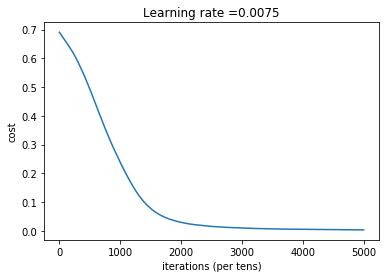

In [371]:
parameters, costs = L_layer_model_simple(x, y, layers_dims, iterations = 5000, log_every=500)

The loss calculated on the entire dataset decreases smoovely meaning that the gradient descent is implemented correctly.

# Real World Dataset (Dogs/Cats Classifier)
In this part the network will be applied to real world tasks such as photo classification. We'll train the network on 2,000 labeled images of cats and dogs and then evaluate it on 500 examples of test data.

### Load and Preprocess Images
Load all images into numpy arrays and resize them to $[64, 64, 3]$. Colored images have 3 RGB channels while black and white images have only 1 channel. This dataset contains only colored images and that's what will be loaded into our 3 separate datasets: **train_set, dev_set and test_set**. 
- Our network will be trained on train_set, then we'll verify how well it's doing on the dev_set and then tweek our parameters. At the very when everything works well we'll test its finally performance using test_set to make sure that our network doesn't overfeet train and dev sets.
- All images will be flattened into $[m, 12288]$ where $m$ is a number of images and $12288 = 64 x 64 x 3$ so that we can feed it into our neural network
- Then we'll normalize (scale) all pixels in our images by dividing them by max value a pixel can have (255) to help the network converge quicker. The reason for this is that if the input values are to high sigmoid activation function has hard time dealing with them and outputs very small numbers which result in tiny gradients during backpropagation and therefore slow down the learning process. (Look at the graph above showing sigmoid function). 

In [240]:
# Directories
TRAIN_DIR = 'input/train/'
TEST_DIR = "test/"

# Image size
HIGHT, WIDTH, CHANNELS = 64, 64, 3

# Load the image directories into variables and split them into separate data sets.
img_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
img_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

train_images = img_dogs[:1000] + img_cats[:1000]
dev_images = img_dogs[1000:1250] + img_cats[1000:1250]
test_images = img_dogs[1250:1500] + img_cats[1250:1500]

# Randomly shuffle the images
random.shuffle(train_images), random.shuffle(dev_images), random.shuffle(test_images)

# Load the image from given directorie
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

# Load the images into 64 x 64 x 3 numpy arrays
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

# Flatten the images with dimensions [64, 64, 3] into one row array [12288, 1]. (12288 = 64*64*3)
def flatten_images(data):
    m = data.shape[0]
    depth = data.shape[1]
    width = data.shape[2]
    height = data.shape[3]
    
    flatten_images = data.reshape(m, depth*width*height)
    return flatten_images

# Noramlize the images by dividing the pixels by the highest value they can be which is 255.
def normalize_images(images):
    return images / 255

# Create labels for the images
def create_labels(images):
    labels = []
    for i in images:
        if 'dog' in i:
            labels.append(1)
        else:
            labels.append(0)
    labels = np.array(labels, ndmin=2).T
    return labels


# Load images into datasets
train_set = normalize_images(flatten_images(prep_data(train_images)))
dev_set = normalize_images(flatten_images(prep_data(dev_images)))
test_set = normalize_images(flatten_images(prep_data(test_images)))

# Create labels
train_labels = create_labels(train_images)
dev_labels = create_labels(dev_images)
test_labels = create_labels(test_images)

print("Train set shape: {}, Train labels shape: {}".format(train_set.shape, train_labels.shape))
print("Dev set shape: {}, Dev labels shape: {}".format(dev_set.shape, dev_labels.shape))
print("Test set shape: {}, Test labels shape: {}".format(test_set.shape, test_labels.shape))

Processed 0 of 2000
Processed 250 of 2000
Processed 500 of 2000
Processed 750 of 2000
Processed 1000 of 2000
Processed 1250 of 2000
Processed 1500 of 2000
Processed 1750 of 2000
Processed 0 of 500
Processed 250 of 500
Processed 0 of 500
Processed 250 of 500
Train set shape: (2000, 12288), Train labels shape: (2000, 1)
Dev set shape: (500, 12288), Dev labels shape: (500, 1)
Test set shape: (500, 12288), Test labels shape: (500, 1)


**Show an Image**

Show an image of a dog with a label 1 (dog = 1, cat = 0).

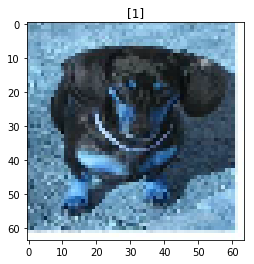

In [241]:
plt.imshow(train_set[110].reshape(64, 64, 3))
plt.title(train_labels[110])
plt.show()

### Build a model (mini-batch)
Training the network on let say 10.000 images at the same time requires a lot of computing power. Therefore to make it easier on our computer we implement mini-batching which divides the dataset into many samples of let's say 64 and then feed that into the neural network. Then we'll test our networks performance on a development set to see how well it generalizes to the images it has not seen before.
- Implemet mini-batches
- Implement test_model() fucntion

In [334]:
def get_batches(images, labels, batch_size):
    ''' Create a generator of images batches as a tuple (inputs, targets) '''
    
    n_batches = len(images) //batch_size
    
    # only full batches
    images = images[:n_batches*batch_size]
    
    for idx in range(0, len(images), batch_size):
        batch_inputs = images[idx:idx+batch_size]
        batch_labels = labels[idx:idx+batch_size]
        
        yield (np.array(batch_inputs).T , np.array(batch_labels, ndmin=2).T)

In [335]:
def test_model(AL, Y):
    # Number of examples
    m = Y.shape[1]
    correct = 0
    for i in range(m):
        if(AL[0,i] >= 0.5 and Y[0,i] == 1):
            correct += 1
            
        elif(AL[0,i] < 0.5 and Y[0,i] == 0):
            correct += 1
            
    prob = (correct / m) * 100
    return prob        

In [387]:
def L_layer_model_default(x, y, X_dev, Y_dev, layers_dims, epochs, parameters=None, costs=None, learning_rate = 0.0075, log_every = 10):
    
    if parameters == None:
        parameters = initialize_parameters(layers_dims)
        costs = []
        
    
    for epoch in range(epochs):
        batches = get_batches(x, y, 2000)
        
        for i, (X, Y) in enumerate(batches):
            
            AL, caches = L_model_forward(X, parameters)

            cost = compute_cost(AL, Y)
            costs.append(cost)

            grads = L_model_backward(AL, Y, caches)

            parameters = update_parameters(parameters, grads, learning_rate)

            
        if epoch % log_every == 0:
            AL, _ = L_model_forward(X_dev, parameters)
            prob = test_model(AL, Y_dev)
            print("Epoch:", epoch, "Cost:", cost, "Dev performance:", prob)


        

            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, costs

### Train the Network
Train the network without any regularization techniques to see its default performance.

In [388]:
# Constants #
layers_dims = [12288, 256, 7, 5, 1]

Epoch: 0 Cost: 0.7644870968564936 Dev performance: 60.4
Epoch: 20 Cost: 0.26913524642306824 Dev performance: 58.599999999999994
Epoch: 40 Cost: 0.9318101673851559 Dev performance: 52.2
Epoch: 60 Cost: 0.2857790073275078 Dev performance: 56.39999999999999
Epoch: 80 Cost: 0.31577270786554446 Dev performance: 55.60000000000001
Epoch: 100 Cost: 0.3367407239412904 Dev performance: 58.8
Epoch: 120 Cost: 0.22473997461839076 Dev performance: 59.4
Epoch: 140 Cost: 0.7568688835057309 Dev performance: 59.4
Epoch: 160 Cost: 0.31203564981052045 Dev performance: 57.99999999999999
Epoch: 180 Cost: 0.25957601163761024 Dev performance: 58.8
Epoch: 200 Cost: 0.25636536553729256 Dev performance: 54.400000000000006
Epoch: 220 Cost: 0.2445920527542763 Dev performance: 58.199999999999996
Epoch: 240 Cost: 0.23682119474573635 Dev performance: 56.2
Epoch: 260 Cost: 0.8233592910669176 Dev performance: 56.2
Epoch: 280 Cost: 0.3373489526686549 Dev performance: 60.199999999999996
Epoch: 300 Cost: 0.217065637485912

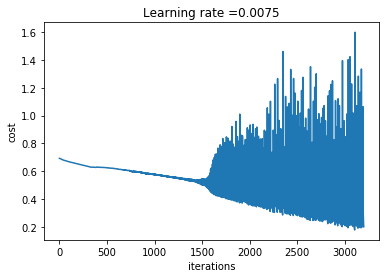

In [394]:
parameters, costs = L_layer_model_default(train_set[0:2000], train_labels[0:2000], dev_set[:500].T, dev_labels[:500].T, 
                                          layers_dims, epochs = 500, parameters=parameters, costs=costs, log_every=20)

**Analysis:**

Around the $1500th$ iteration the cost shown on the graph is extremaly wiggle. This is caused by exploding gradients. The weights keep increasing also causing the gradients to increase which then results in even greater change in weights. This continues until the weights overflow and become **Nan**.

In [395]:
print(parameters["W1"])

[[ 0.01524733 -0.0047207  -0.00450476 ..., -0.00531513 -0.00342559
   0.00794028]
 [ 0.00855312  0.00206966 -0.00626922 ...,  0.00495552 -0.00208478
   0.00046748]
 [-0.00082655  0.00114169  0.00624347 ...,  0.00593755 -0.00056147
  -0.0088975 ]
 ..., 
 [-0.01231481  0.01231275  0.00553943 ..., -0.01492595 -0.00306558
   0.00618447]
 [ 0.0084165   0.02305398 -0.00345911 ..., -0.01279296  0.02284275
   0.00310887]
 [-0.00259337  0.0001295  -0.01730905 ...,  0.00986485 -0.00628366
   0.00495594]]


### Build a model (L2 norm)
The graph above shows that the loss function is extremaly wiggle. This happens because of something called exploding gradients resulting in large changes in loss from update to update. In deep multilayer neural networks, exploding gradients can result in an unstable network that at best cannot learn from the training data and at worst results in NaN weight values that can no longer be updated. 
- In order to deal with exploding gradients we'll implement L2 norm which applies penalty to the network's loss function for large weight values.
- Then we'll reduce batch_size to 32 (apparently it helps)